# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


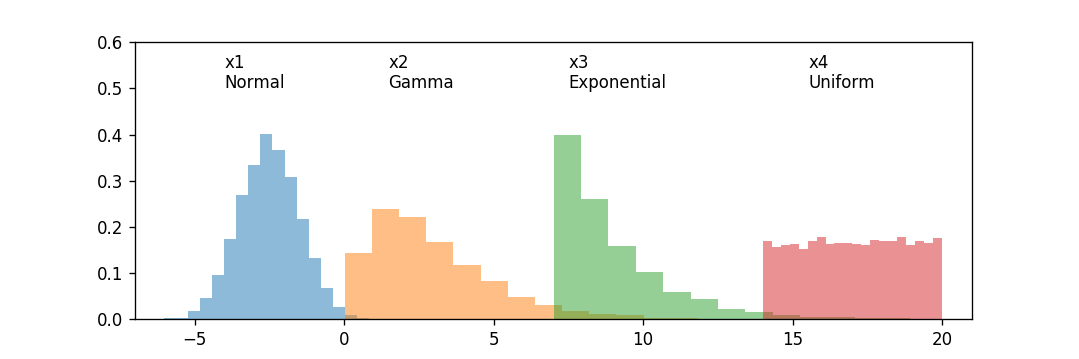

In [32]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [ ]:
conda install ffmpeg

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

%matplotlib notebook

fig = plt.figure(figsize = (8,8))
gspec = gridspec.GridSpec(2, 2, hspace = 0.5, wspace = 0.5)

normal_hist = plt.subplot(gspec[0,0])
gamma_hist = plt.subplot(gspec[0,1])
expo_hist = plt.subplot(gspec[1,0])
uniform_hist = plt.subplot(gspec[1,1])

hists = [normal_hist, gamma_hist, expo_hist, uniform_hist]
    
def update(curr):
    if(curr == (900)):
        a.event_source.stop()
        
    for hist in hists:
        hist.cla()
    
    sample_size = np.random.randint(100, 1000)
    x1 = np.random.normal(loc = 2.5, scale = 1.0, size = sample_size) + 2.5
    x2 = np.random.gamma(shape = 2, scale = 1.0, size = sample_size)
    x3 = np.random.exponential(scale = 2, size = sample_size)
    x4 = np.random.uniform(size = sample_size)
    var = [x1, x2, x3, x4]
    titles = ['Normal Distribution', 'Gamma Distribution', 'Exponential Distribution', 'Uniform Distribution']
    
    bins = int((sample_size ** (1/3)) * 2) # Rice's Rule
    
    for ax in hists[:-1]:
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 0.5)
    uniform_hist.set_xlim(0, 1)
    uniform_hist.set_ylim(0, 1.25)

    for i in range(0,len(hists)):
        hists[i].hist(var[i], density = True, bins = bins)
        hists[i].set_ylabel('Frequency')
        hists[i].set_xlabel('Value')
        hists[i].set_title('{} with size = {} | bins = {}'.format(titles[i], sample_size, bins), fontsize = 10)

a = animation.FuncAnimation(fig, update, interval = 1000)

from matplotlib.widgets import Button

def onclick_stop(event):
    a.event_source.stop()
    
def onclick_start(event):
    a.event_source.start()
    
stop_btn = Button(fig.add_axes([0.8, 0.0, 0.1, 0.05]), "Stop", color = "orange", hovercolor = "red")
stop_btn.on_clicked(onclick_stop)
start_btn = Button(fig.add_axes([0.7, 0.0, 0.1, 0.05]), "Start", color = "yellow", hovercolor = "green")
start_btn.on_clicked(onclick_start)

a.save("anim.mp4", writer = "ffmpeg")

<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4